In [1]:
#Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
#Load the dataset
from google.colab import files
uploaded = files.upload()

Saving filename.csv to filename.csv


In [3]:
#Read the csv file
data = pd.read_csv('filename.csv')
print(data.head())

                    id      conversation_id               created_at  \
0  1525304179018940421  1525304179018940421  2022-05-14 02:37:09 UTC   
1  1525304176036564992  1525304176036564992  2022-05-14 02:37:09 UTC   
2  1525304173176049666  1525304173176049666  2022-05-14 02:37:08 UTC   
3  1525304171779325952  1525304171779325952  2022-05-14 02:37:07 UTC   
4  1525304167388000258  1525303681729568768  2022-05-14 02:37:06 UTC   

         date      time  timezone              user_id         username  \
0  2022-05-14  02:37:09         0  1417037325822054402  christo01098190   
1  2022-05-14  02:37:09         0           1565703367    tianfu_kizmet   
2  2022-05-14  02:37:08         0  1191398917151133696  aussieedddoggie   
3  2022-05-14  02:37:07         0  1369169778019950592      fitzflyer83   
4  2022-05-14  02:37:06         0  1224913418823458816         0xfff747   

                   name  place  ... geo source user_rt_id user_rt retweet_id  \
0  Christopher Heimarck    NaN  ... 

In [4]:
#column names of dataset
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [5]:
data = data[['username', 'tweet', 'language']]

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [7]:
#tweets posted in which lang
data['language'].value_counts()

en     8806
pt      466
und     201
it      105
es       85
ja       65
in       56
de       54
ca       26
ru       25
th       19
fr       11
ro        8
nl        8
hi        7
ar        7
zh        6
pl        6
fi        5
tl        5
cs        4
et        4
cy        4
uk        4
tr        3
vi        3
sv        1
te        1
iw        1
lv        1
gu        1
ko        1
bg        1
mr        1
ur        1
da        1
ta        1
Name: language, dtype: int64

In [8]:
#removing all links, punctuations and other language errors
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

data['tweet'] = data['tweet'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


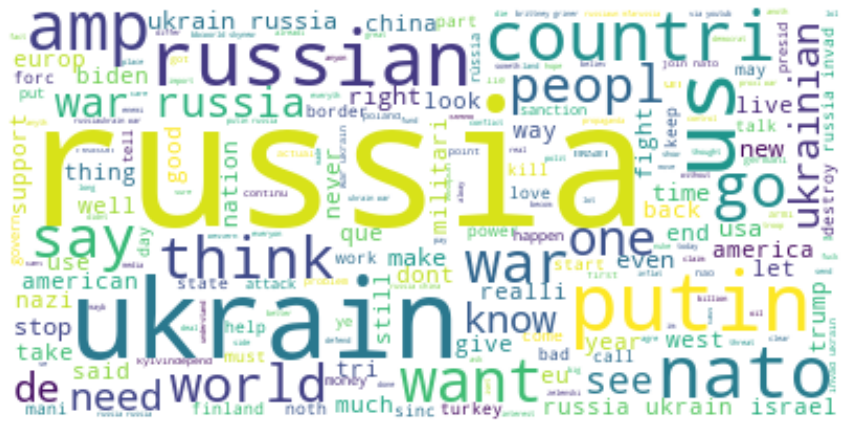

In [9]:
#most frequently used words intweet
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#adding more columns
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['tweet']]
data = data[['tweet', 'Positive', 'Negative', 'Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
                                               tweet  Positive  Negative  \
0  instrument death larg gun etc given boy russia...      0.00     0.587   
1       inflat russia hit  april highest sinc earli       0.00     0.000   
2  ukrain news live russian agent believ putin te...      0.07     0.325   
3  russia cut electr suppli finland saturday heel...      0.00     0.189   
4  jungerianjihad cant wait actual meet american ...      0.00     0.000   

   Neutral  
0    0.413  
1    1.000  
2    0.605  
3    0.811  
4    1.000  


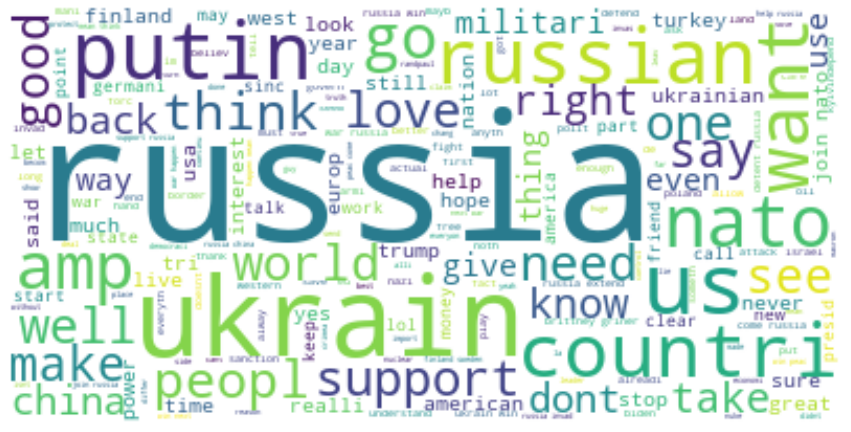

In [11]:
#most frequent words used with positive sentiments
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

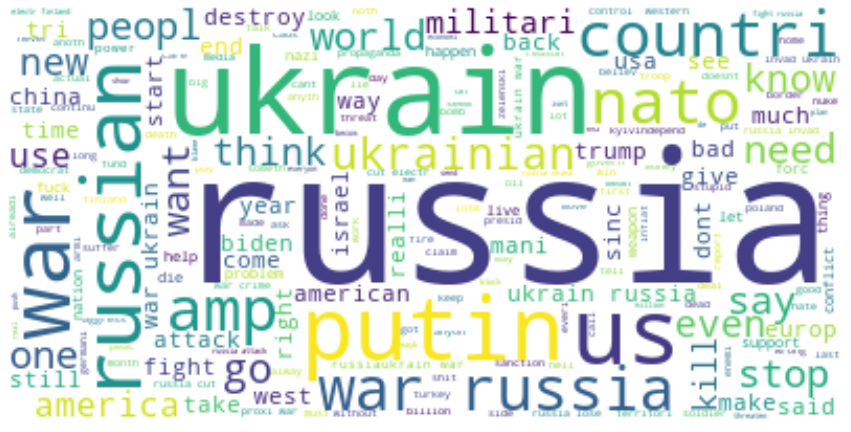

In [12]:
#most frequent words used with negative sentiments
negative = ' '.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()